In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import torch
from torch import nn

In [2]:
#making moon dataset
n_samples = 1000
X, y = make_moons(n_samples, noise = 0.03, random_state = 42)

In [3]:
X[:5], y[:5]

(array([[-0.00933187,  0.39098105],
        [ 0.95457387, -0.47375583],
        [ 0.9185256 , -0.42519648],
        [ 0.41276802, -0.37638459],
        [-0.84532016,  0.52879908]]),
 array([1, 1, 1, 1, 0], dtype=int64))

In [4]:
#dataframe
moons = pd.DataFrame({"X1": X[:,0], "X2": X[:,1], "label": y})
moons

,X1,X2,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0
...,...,...,...
995,0.793018,0.591402,0
996,-0.138777,0.968000,0
997,1.653915,-0.291798,1
998,-0.934102,0.353582,0


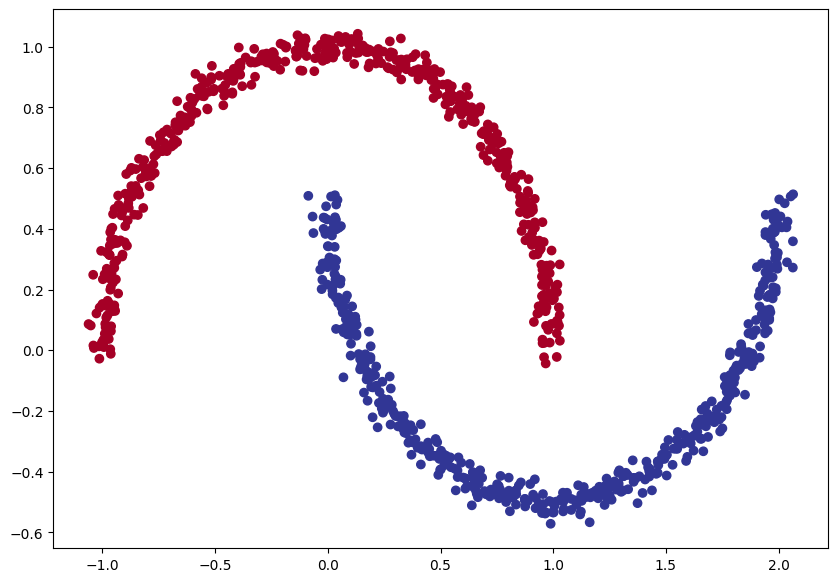

In [5]:
plt.figure(figsize = (10, 7))
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.RdYlBu)

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [8]:
X[:5], y[:5]

(tensor([[-0.0093,  0.3910],
         [ 0.9546, -0.4738],
         [ 0.9185, -0.4252],
         [ 0.4128, -0.3764],
         [-0.8453,  0.5288]]),
 tensor([1., 1., 1., 1., 0.]))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [10]:
class MoonModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
        self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
        self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [11]:
torch.manual_seed(42)
model_0 = MoonModel()
model_0

MoonModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [12]:
#loss function
loss_fn = nn.BCEWithLogitsLoss()

In [13]:
#optimizer
optimizer = torch.optim.SGD(model_0.parameters(), lr = 0.1)

In [14]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_true)) * 100
    return acc

In [15]:
torch.manual_seed(42)
epochs = 1000

In [16]:
#training and validation
for epoch in range(epochs):
    model_0.train()
    train_logits = model_0(X_train).squeeze()
    train_preds = torch.round(torch.sigmoid(train_logits))
    train_loss = loss_fn(train_logits, y_train)
    train_acc = accuracy_fn(y_train, train_preds)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_preds)
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.2f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}")

Epoch: 0 | Train Loss: 0.69537 | Train Acc: 37.75 | Test Loss: 0.69457 | Test Acc: 49.50
Epoch: 100 | Train Loss: 0.38636 | Train Acc: 81.88 | Test Loss: 0.40196 | Test Acc: 77.00
Epoch: 200 | Train Loss: 0.23664 | Train Acc: 88.62 | Test Loss: 0.23758 | Test Acc: 90.00
Epoch: 300 | Train Loss: 0.19082 | Train Acc: 91.38 | Test Loss: 0.18528 | Test Acc: 92.50
Epoch: 400 | Train Loss: 0.15147 | Train Acc: 93.75 | Test Loss: 0.14452 | Test Acc: 94.00
Epoch: 500 | Train Loss: 0.10692 | Train Acc: 95.62 | Test Loss: 0.09974 | Test Acc: 97.50
Epoch: 600 | Train Loss: 0.06902 | Train Acc: 98.50 | Test Loss: 0.06297 | Test Acc: 99.00
Epoch: 700 | Train Loss: 0.04417 | Train Acc: 99.75 | Test Loss: 0.03937 | Test Acc: 99.50
Epoch: 800 | Train Loss: 0.03007 | Train Acc: 100.00 | Test Loss: 0.02625 | Test Acc: 100.00
Epoch: 900 | Train Loss: 0.02188 | Train Acc: 100.00 | Test Loss: 0.01887 | Test Acc: 100.00


In [17]:
model_0.eval()

with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_0(X_test)))
    
y_preds[:5]

tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.]])

In [18]:
from helper_functions import plot_predictions, plot_decision_boundary

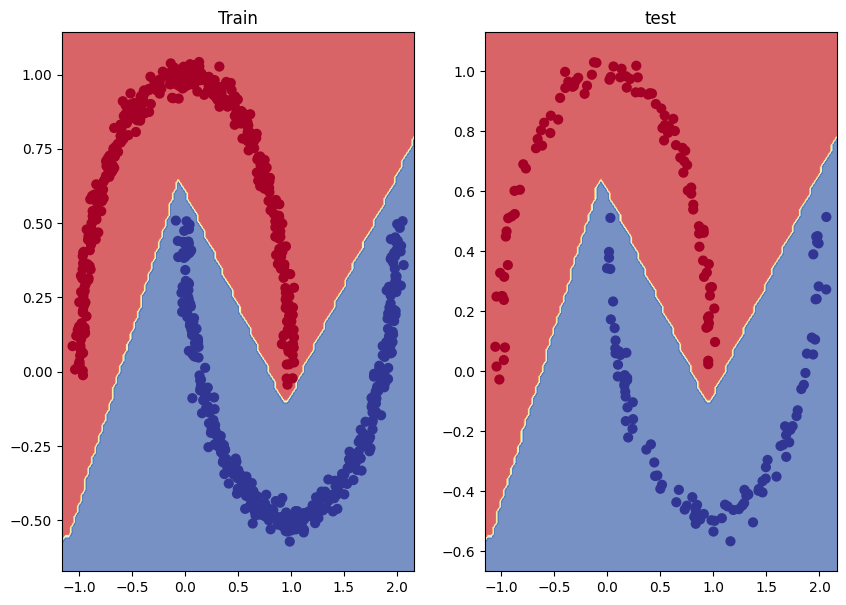

In [19]:
plt.figure(figsize = (10, 7))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_0, X_test, y_test)

In [20]:
#tanh function
def tanh(x = 5):
    return ((torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x)))

In [21]:
#model with tanh activation function
class MoonTanhModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
        self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
        self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    
    def forward(self, x):
        return self.layer_3(tanh(self.layer_2(tanh(self.layer_1(x)))))

In [22]:
torch.manual_seed(42)
model_1 = MoonTanhModel()
model_1

MoonTanhModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [23]:
#loss function
loss_fn = nn.BCEWithLogitsLoss()

In [24]:
#optimizer
optimizer = torch.optim.SGD(model_1.parameters(), lr = 0.1)

In [25]:
torch.manual_seed(42)
epochs = 1000

In [26]:
#training and validation
for epoch in range(epochs):
    model_1.train()
    train_logits = model_1(X_train).squeeze()
    train_preds = torch.round(torch.sigmoid(train_logits))
    train_loss = loss_fn(train_logits, y_train)
    train_acc = accuracy_fn(y_train, train_preds)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_preds)
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.2f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}")

Epoch: 0 | Train Loss: 0.71513 | Train Acc: 30.63 | Test Loss: 0.70451 | Test Acc: 34.50
Epoch: 100 | Train Loss: 0.30251 | Train Acc: 85.50 | Test Loss: 0.31252 | Test Acc: 85.50
Epoch: 200 | Train Loss: 0.24376 | Train Acc: 89.25 | Test Loss: 0.23887 | Test Acc: 90.50
Epoch: 300 | Train Loss: 0.21197 | Train Acc: 90.38 | Test Loss: 0.20240 | Test Acc: 92.00
Epoch: 400 | Train Loss: 0.15704 | Train Acc: 93.88 | Test Loss: 0.14712 | Test Acc: 93.50
Epoch: 500 | Train Loss: 0.09760 | Train Acc: 96.38 | Test Loss: 0.09010 | Test Acc: 98.00
Epoch: 600 | Train Loss: 0.05943 | Train Acc: 98.88 | Test Loss: 0.05415 | Test Acc: 99.00
Epoch: 700 | Train Loss: 0.03915 | Train Acc: 99.75 | Test Loss: 0.03522 | Test Acc: 100.00
Epoch: 800 | Train Loss: 0.02796 | Train Acc: 100.00 | Test Loss: 0.02487 | Test Acc: 100.00
Epoch: 900 | Train Loss: 0.02123 | Train Acc: 100.00 | Test Loss: 0.01869 | Test Acc: 100.00


In [27]:
model_1.eval()

with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_1(X_test)))
    
y_preds[:5]

tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.]])

In [28]:
from helper_functions import plot_predictions, plot_decision_boundary

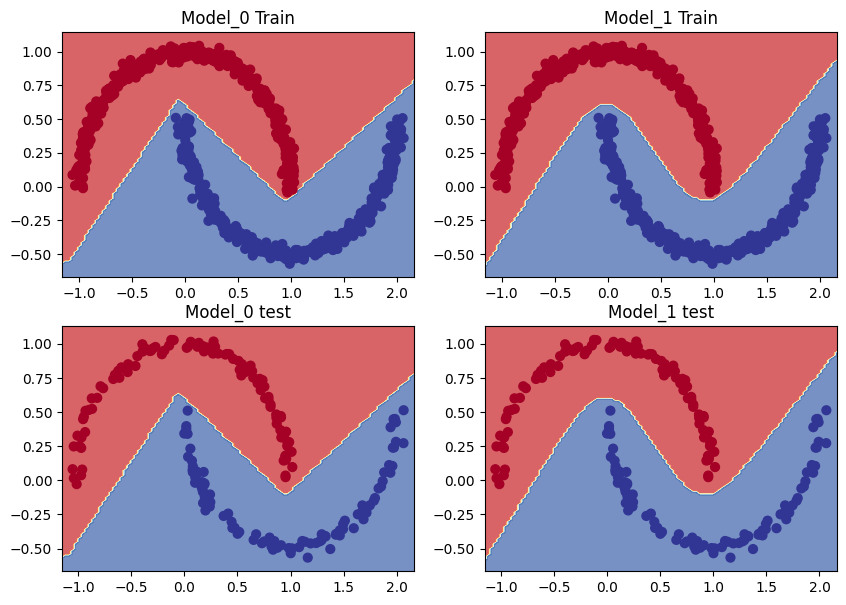

In [29]:
#difference between relu and tanh activation function
plt.figure(figsize = (10, 7))
plt.subplot(2, 2, 1)
plt.title("Model_0 Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(2, 2, 2)
plt.title("Model_1 Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(2, 2, 3)
plt.title("Model_0 test")
plot_decision_boundary(model_0, X_test, y_test)
plt.subplot(2, 2, 4)
plt.title("Model_1 test")
plot_decision_boundary(model_1, X_test, y_test)

In [30]:
import numpy as np
n_per_class = 100
dim = 2
classes = 3
X = np.zeros((n_per_class * classes, dim))
y = np.zeros(n_per_class * classes, dtype = 'uint8')
for j in range(classes):
    ix = range(n_per_class * j, n_per_class * (j + 1))
    r = np.linspace(0.0, 1, n_per_class)
    t = np.linspace(j * 4, (j + 1) * 4, n_per_class) + np.random.rand(n_per_class) * 0.2
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

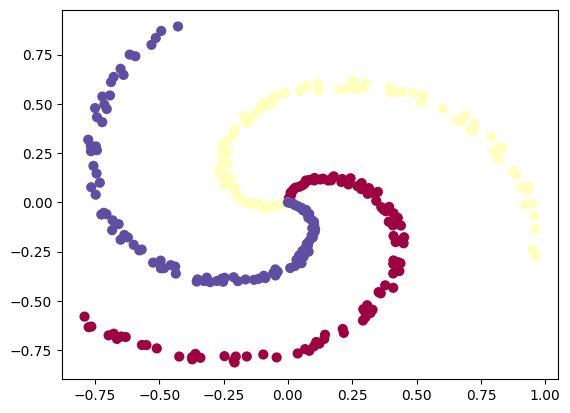

In [31]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.Spectral)
plt.show()

In [32]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

In [33]:
X[:5], y[:5]

(tensor([[0.0000, 0.0000],
         [0.0022, 0.0099],
         [0.0034, 0.0199],
         [0.0086, 0.0290],
         [0.0126, 0.0384]]),
 tensor([0, 0, 0, 0, 0]))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X_train), len(X_test), len(y_train), len(y_test)

(240, 60, 240, 60)

In [35]:
#multiclass classification model
class SpiralModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units = 8):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = input_features, out_features = hidden_units)
        self.layer_2 = nn.Linear(in_features = hidden_units, out_features = hidden_units)
        self.layer_3 = nn.Linear(in_features = hidden_units, out_features = output_features)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [36]:
model_3 = SpiralModel(dim, classes, hidden_units = 8)
model_3

SpiralModel(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=8, bias=True)
  (layer_3): Linear(in_features=8, out_features=3, bias=True)
  (relu): ReLU()
)

In [37]:
#loss function
loss_fn = nn.CrossEntropyLoss()

In [38]:
#optimizer
optimizer = torch.optim.Adam(model_3.parameters(), lr = 0.1)

In [39]:
y_logits = model_3(X_test)
y_logits[:5]

tensor([[-0.0732, -0.3827, -0.2453],
        [-0.0516, -0.3171, -0.1938],
        [-0.0878, -0.4117, -0.2909],
        [-0.0761, -0.3903, -0.2551],
        [-0.0585, -0.3524, -0.2097]], grad_fn=<SliceBackward0>)

In [40]:
y_pred_probs = torch.softmax(y_logits, dim = 1)
y_pred_probs[:5]

tensor([[0.3882, 0.2849, 0.3269],
        [0.3796, 0.2911, 0.3293],
        [0.3938, 0.2848, 0.3214],
        [0.3896, 0.2846, 0.3258],
        [0.3839, 0.2861, 0.3300]], grad_fn=<SliceBackward0>)

In [41]:
y_pred = torch.argmax(y_pred_probs, dim = 1)
y_pred[:5]

tensor([0, 0, 0, 0, 0])

In [42]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_true)) * 100
    return acc

In [43]:
#training and validation
torch.manual_seed(42)
epochs = 1100
for epoch in range(epochs):
    model_3.train()
    train_logits = model_3(X_train).squeeze()
    train_preds = torch.softmax(train_logits, dim = 1).argmax(dim = 1)
    train_loss = loss_fn(train_logits, y_train)
    train_acc = accuracy_fn(y_train, train_preds)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test)
        test_preds = torch.softmax(test_logits, dim = 1).argmax(dim = 1)
        test_loss = loss_fn(test_logits, y_test)
        test_accuracy = accuracy_fn(y_test, test_preds)
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Train acc: {train_acc:.2f} | Test Loss: {test_loss:.5f} | Test acc: {test_acc:.2f}")

Epoch: 0 | Train Loss: 1.10265 | Train acc: 32.50 | Test Loss: 1.07216 | Test acc: 100.00
Epoch: 100 | Train Loss: 0.02105 | Train acc: 99.17 | Test Loss: 0.11217 | Test acc: 100.00
Epoch: 200 | Train Loss: 0.01580 | Train acc: 99.17 | Test Loss: 0.15624 | Test acc: 100.00
Epoch: 300 | Train Loss: 0.04550 | Train acc: 98.75 | Test Loss: 0.01916 | Test acc: 100.00
Epoch: 400 | Train Loss: 0.02883 | Train acc: 99.17 | Test Loss: 0.02901 | Test acc: 100.00
Epoch: 500 | Train Loss: 0.02497 | Train acc: 99.17 | Test Loss: 0.03353 | Test acc: 100.00
Epoch: 600 | Train Loss: 0.02248 | Train acc: 99.17 | Test Loss: 0.03635 | Test acc: 100.00
Epoch: 700 | Train Loss: 0.02071 | Train acc: 99.17 | Test Loss: 0.03913 | Test acc: 100.00
Epoch: 800 | Train Loss: 0.01938 | Train acc: 99.17 | Test Loss: 0.03870 | Test acc: 100.00
Epoch: 900 | Train Loss: 0.01835 | Train acc: 99.17 | Test Loss: 0.03950 | Test acc: 100.00
Epoch: 1000 | Train Loss: 0.01755 | Train acc: 99.17 | Test Loss: 0.03551 | Test a

In [44]:
model_3.eval()
with torch.inference_mode():
    y_logits = model_3(X_test)
y_logits[:5]

tensor([[ -2.4805,  -4.4455,   3.5237],
        [-44.6779,   5.5011,  15.4405],
        [  0.5084,   6.2504,  -9.6230],
        [  8.4452,  -6.7671,  -0.6975],
        [-13.6153,  -4.0648,   9.3213]])

In [45]:
y_preds = torch.softmax(y_logits, dim = 1).argmax(dim = 1)

In [46]:
y_preds[:5]

tensor([2, 2, 1, 0, 2])

In [47]:
print(f"Predictions: {y_preds[:20]}")
print(f"Actual: {y_test[:20]}")
print(f"Accuracy: {accuracy_fn(y_test, y_preds)}")

Predictions: tensor([2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1])
Actual: tensor([2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1])
Accuracy: 98.33333333333333


In [48]:
from helper_functions import plot_predictions, plot_decision_boundary

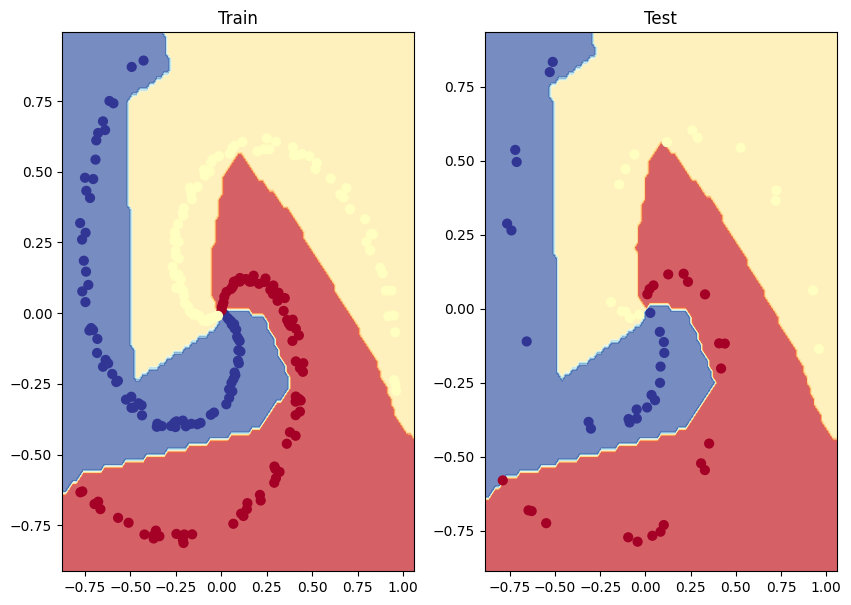

In [49]:
plt.figure(figsize = (10, 7))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)